Q1: Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from 

In [84]:
import pandas as pd

In [85]:
airlines = pd.read_excel('/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/EastWestAirlines.xlsx',sheet_name='data')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [86]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [87]:
airlines2 = airlines.drop(['ID#'],axis=1)
airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


HIERARCHIAL CLUSTERING

In [88]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [89]:
airlines2_norm=norm_func(airlines)
airlines2_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [100]:
#creating dendogram
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

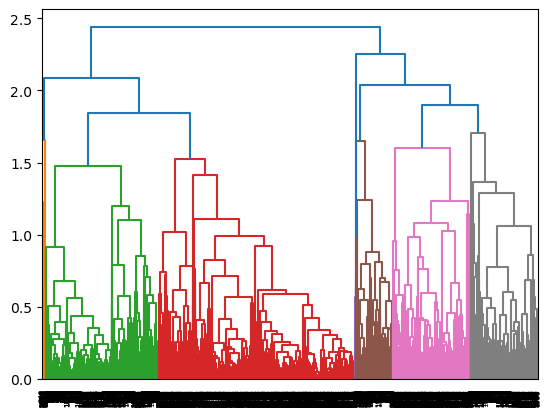

In [99]:
dendrograms  = sch.dendrogram(sch.linkage(airlines2_norm,'complete'))

In [97]:
hclusters = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage = 'ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [92]:
y = pd.DataFrame(hclusters.fit_predict(airlines2_norm),columns=['CLUSTERSID'])
y['CLUSTERSID'].value_counts()

0    912
4    884
2    838
1    796
3    569
Name: CLUSTERSID, dtype: int64

In [93]:
airlines['CLUSTERSID']=hclusters.labels_
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CLUSTERSID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [70]:
airlines.groupby('CLUSTERSID').agg(['mean']).reset_index()

,CLUSTERSID,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CLUSTERID_NEW
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1495.437410,112999.685612,77.614388,3.538129,1.000000,1.035252,36543.620144,17.916547,335.182014,1.055396,5051.097842,0.626619,0.798561
1,1,1516.770785,58941.027195,274.203574,1.042735,1.000000,1.000000,4671.501166,6.918415,582.479409,1.678322,4982.505828,0.409479,0.956488
2,2,3149.834704,41328.942434,69.819901,1.440789,1.000000,1.000000,6968.373355,7.905428,103.340461,0.315789,2104.125000,0.009868,2.990132
3,3,1567.285714,129958.047619,470.301587,2.777778,1.000000,1.000000,42050.492063,35.253968,7515.777778,22.015873,4878.222222,0.857143,1.301587
4,4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,1.813953


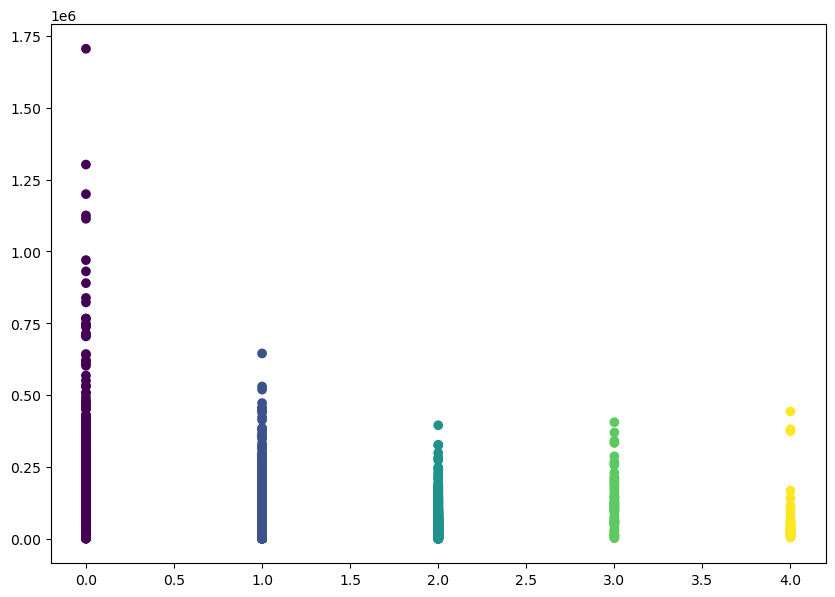

In [71]:
# plot clusters
plt.figure(figsize=(10,7))
plt.scatter(airlines['CLUSTERSID'],airlines['Balance'],c=hclusters.labels_)

K MEANS

In [72]:
#THE K-MEANS ALGORITHM AIMS TO CHOOSE THE CENTROIDS THAT MINIMISE THE INERTIA OR WITHIN-CLUSTER SUM OF SQUARESCRITERION:
from sklearn.cluster import KMeans

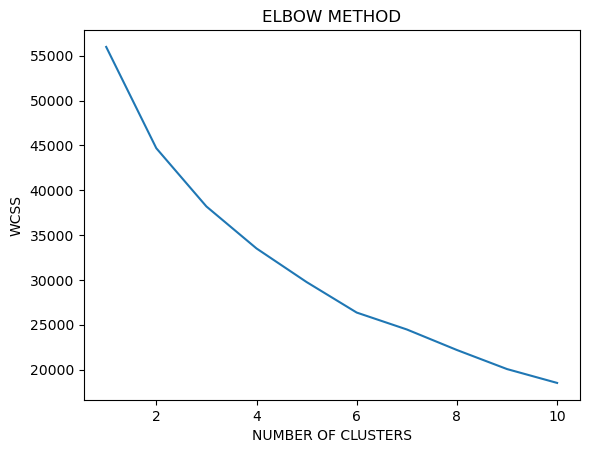

In [73]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(airlines2_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [74]:
#BUILDING CLUSER ALGORITHM
clusters_new = KMeans(4,random_state = 42)
clusters_new.fit(airlines2_norm)

KMeans(n_clusters=4, random_state=42)

In [75]:
clusters_new.labels_

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [76]:
#assigning clusters to the data set
airlines['CLUSTERID_NEW'] = clusters_new.labels_

In [77]:
#STANDARDIZED VALUES ARE
clusters_new.cluster_centers_

array([[ 9.62817975e-01, -3.25425882e-01, -5.47150721e-02,
        -5.22552971e-01,  2.13705627e-02, -3.93148791e-02,
        -4.51701556e-01, -4.15007766e-01, -1.66505458e-01,
        -1.88518301e-01, -9.49488220e-01, -3.80922781e-01,
         1.46981766e-01,  1.04146117e+00],
       [-4.53829566e-01,  3.93160926e-01, -1.94094026e-03,
         1.19826286e+00, -9.29041339e-02,  8.25531786e-02,
         9.12067054e-01,  7.14294635e-01, -1.07095087e-01,
        -1.10761966e-01,  4.52972724e-01,  5.54891845e-01,
        -1.05878568e+00, -5.56628716e-01],
       [-3.08634567e-01,  1.31444281e+00,  9.15347591e-01,
         1.29711806e-01,  1.78231939e-01,  1.11468845e-01,
         7.09422008e-01,  1.78630627e+00,  3.64442439e+00,
         4.01251111e+00,  3.47512273e-01,  1.02217157e+00,
        -9.12857326e-02,  6.31985830e-02],
       [-8.07276739e-01, -1.84599747e-01, -4.59522745e-02,
        -7.02732173e-01,  5.59958829e-02, -5.79065025e-02,
        -5.41789798e-01, -5.07096812e-01, -1.

In [78]:
airlines.groupby('CLUSTERID_NEW').agg(['mean']).reset_index()
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CLUSTERSID,CLUSTERID_NEW
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0


DBSCAN

In [79]:
#normalizing heterogenious numerical data using scalar fit transfrom to dataset.
from sklearn.preprocessing import StandardScaler
airlines2_norm = StandardScaler().fit_transform(airlines)
airlines2_norm

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -2.24911563e-02,  1.51516336e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -2.24911563e-02,  1.51516336e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -2.24911563e-02,  1.51516336e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -1.13288787e+00, -9.84481145e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  1.08790556e+00, -9.84481145e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  1.08790556e+00, -9.84481145e-01]])

In [80]:
#DBSCAN CLUSTERING
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples = 4)
dbscan.fit(airlines2_norm)

DBSCAN(eps=1, min_samples=4)

In [81]:
#noisy samples are given in label -1
dbscan.labels_

array([ 0,  0,  0, ...,  1, 10, 10])

In [82]:
airlines.groupby('CLUSTERS').agg(['mean']).reset_index()

KeyError: 'CLUSTERS'

In [83]:
airlines['CLUSTERS'] = dbscan.labels_
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CLUSTERSID,CLUSTERID_NEW,CLUSTERS
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,9
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0,9
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0,10
